# Ergebnisse Heimbach

## Code

In [1]:
import pandas as pd
import numpy as np

from src import plot

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
df_metris = pd.read_csv("data/Heimbach/All_Heimbach_metrics.csv")
df_metris.set_index('Model_name', inplace=True)
results_metrics = df_metris.to_dict(orient="index")


restored_df = pd.read_csv('data/Heimbach/All_Heimbach_predictions.csv')
restored_predictions = {}

# Iteriere über die einzigartigen Modellnamen im DataFrame
for model_name in restored_df['Model_name'].unique():
    model_data = {}
    model_df = restored_df[restored_df['Model_name'] == model_name]
    # Iteriere über die einzigartigen Datentypen im Modell
    for data_type in model_df['Data_type'].unique():
        values = model_df[model_df['Data_type'] == data_type]['Value'].values
        # Füge die Werte zum Modelldaten-Dictionary hinzu
        model_data[data_type] = values
    # Füge das Modelldaten-Dictionary zum Hauptdictionary hinzu
    restored_predictions[model_name] = model_data
results_pred = {model_name: {**{'Model_name': model_name}, **model_data} for model_name, model_data in restored_predictions.items()}

evaluation = ['train', 'cv_train', 'cv_test', 'test']

MLA = [
    ('Linear Regressor',LinearRegression()),
    ('SVR', SVR(kernel='linear')),
    ('Random Forest',RandomForestRegressor()),
    ('Gradient Boosting', xgb.XGBRegressor())
]

selection_methode = "Heimbach"

## Scatterplots Predictions

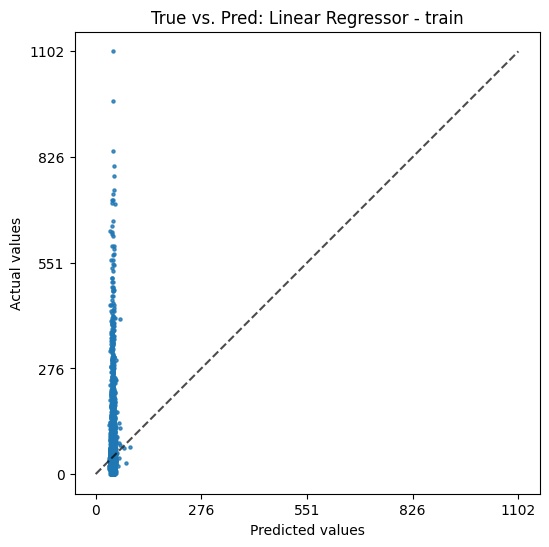

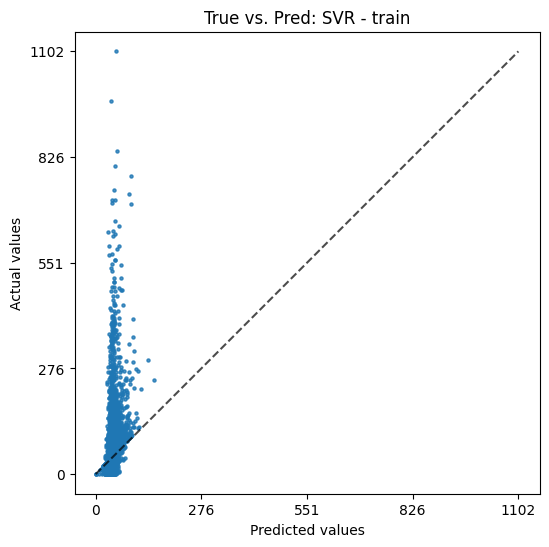

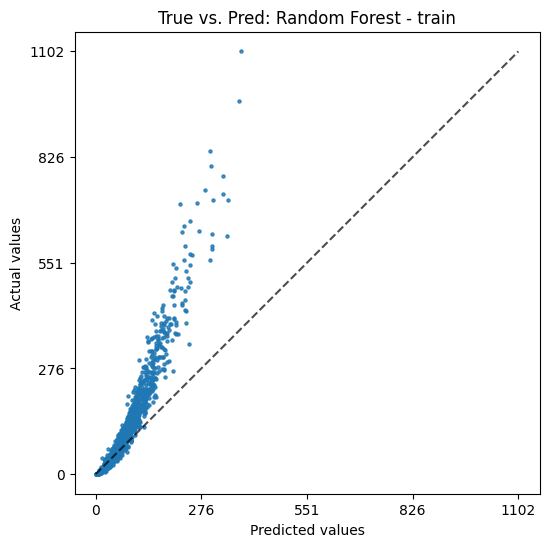

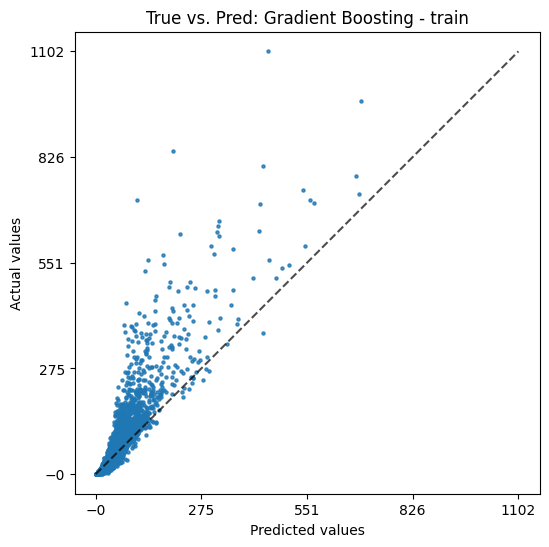

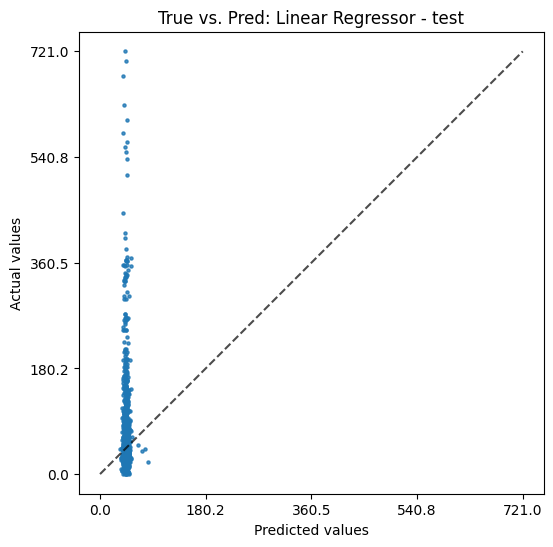

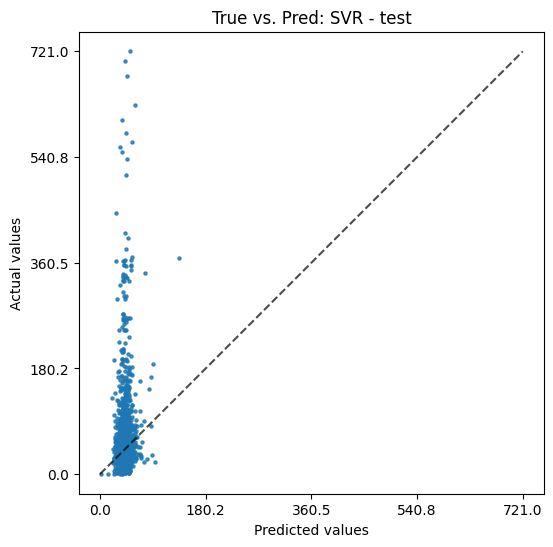

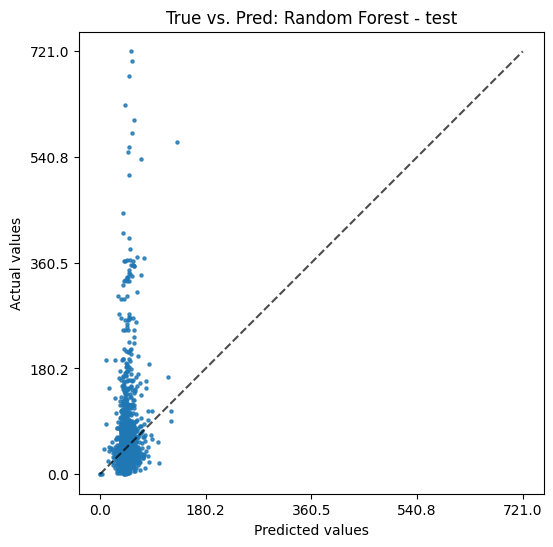

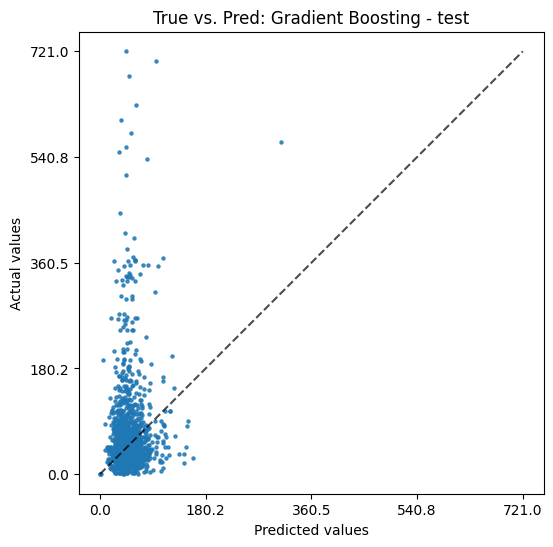

In [3]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.predicitons_scatter(selection_methode, results_pred[model_name], evaluation=item,name="All_Heimbach")

## Histogramm Residuen

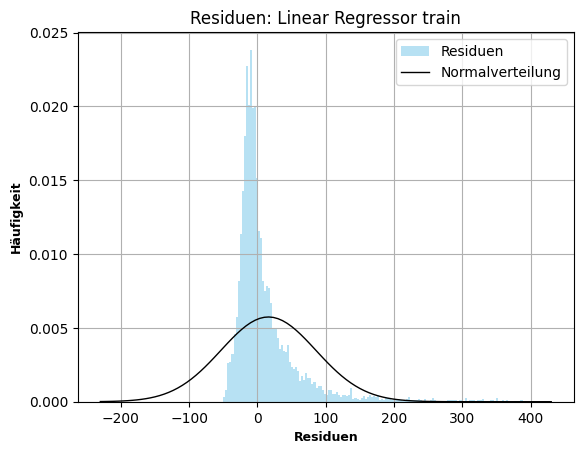

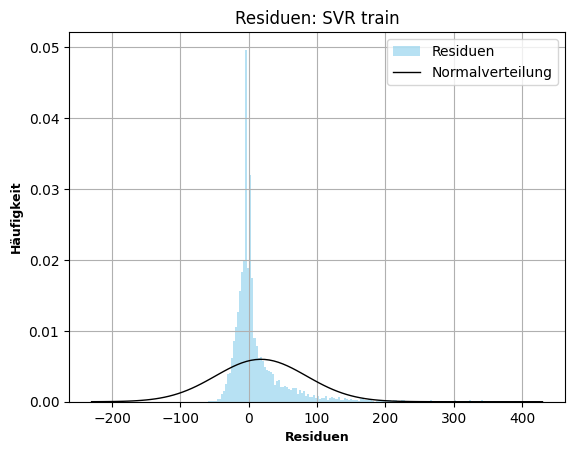

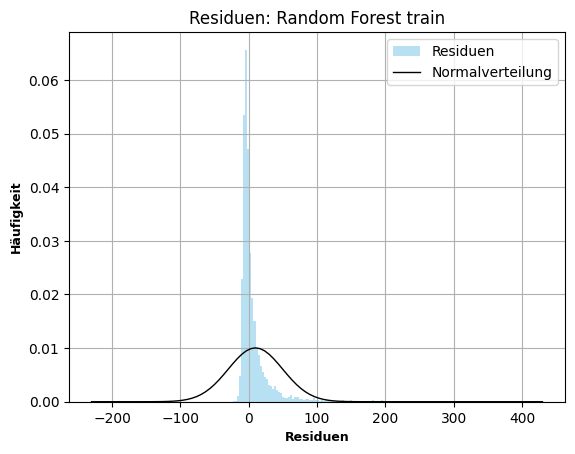

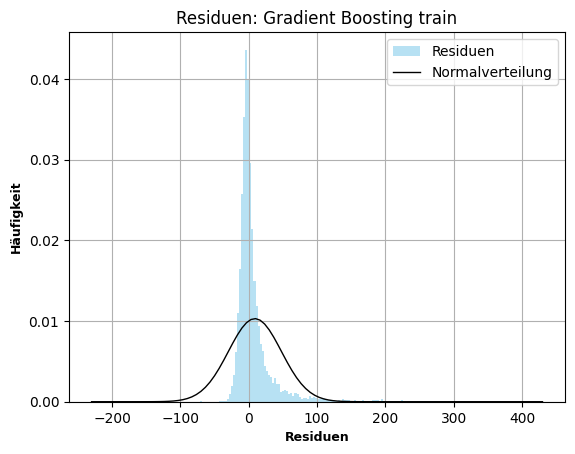

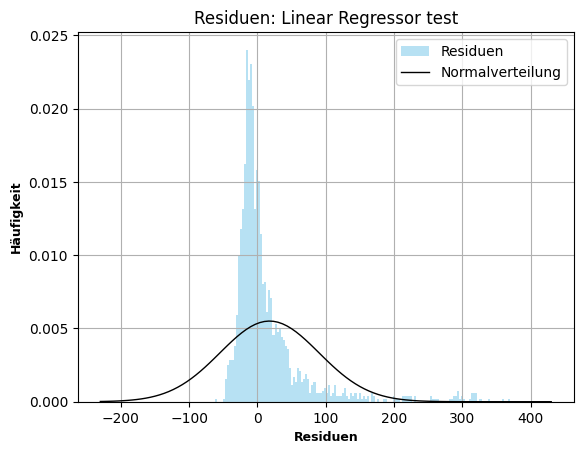

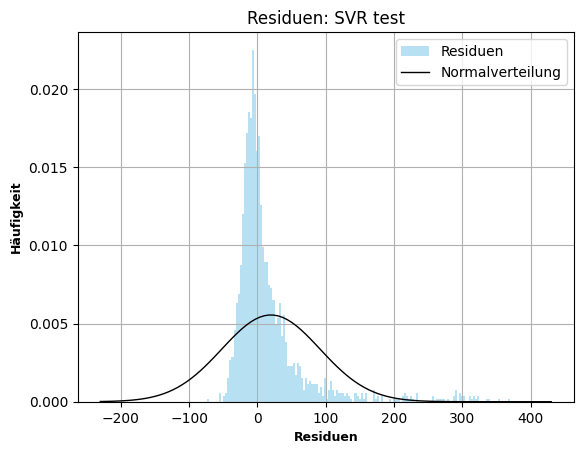

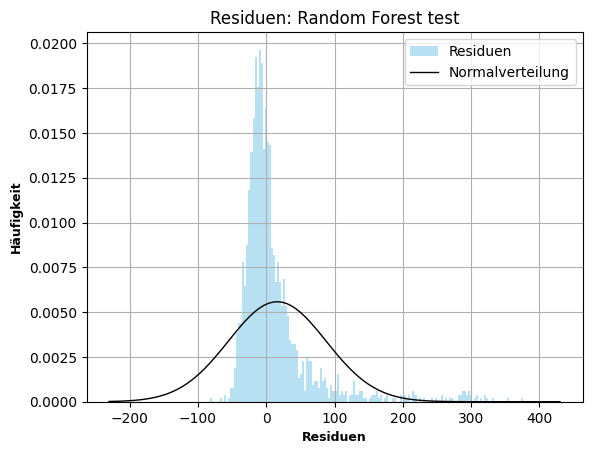

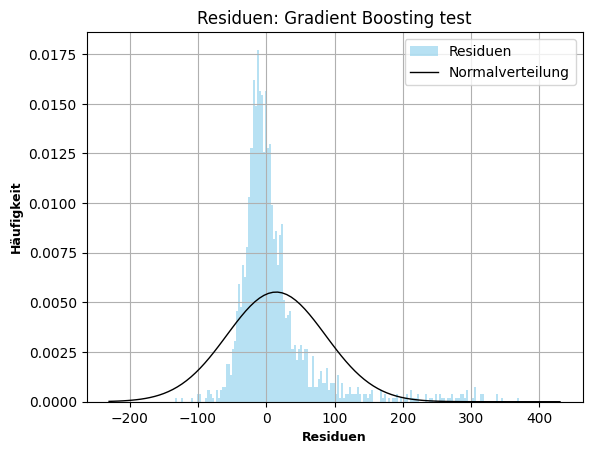

In [4]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.residuen_histo(selection_methode, results_pred[model_name], evaluation=item, name="All_Heimbach", range_min=-200, range_max=400)

## Barplots Metrics

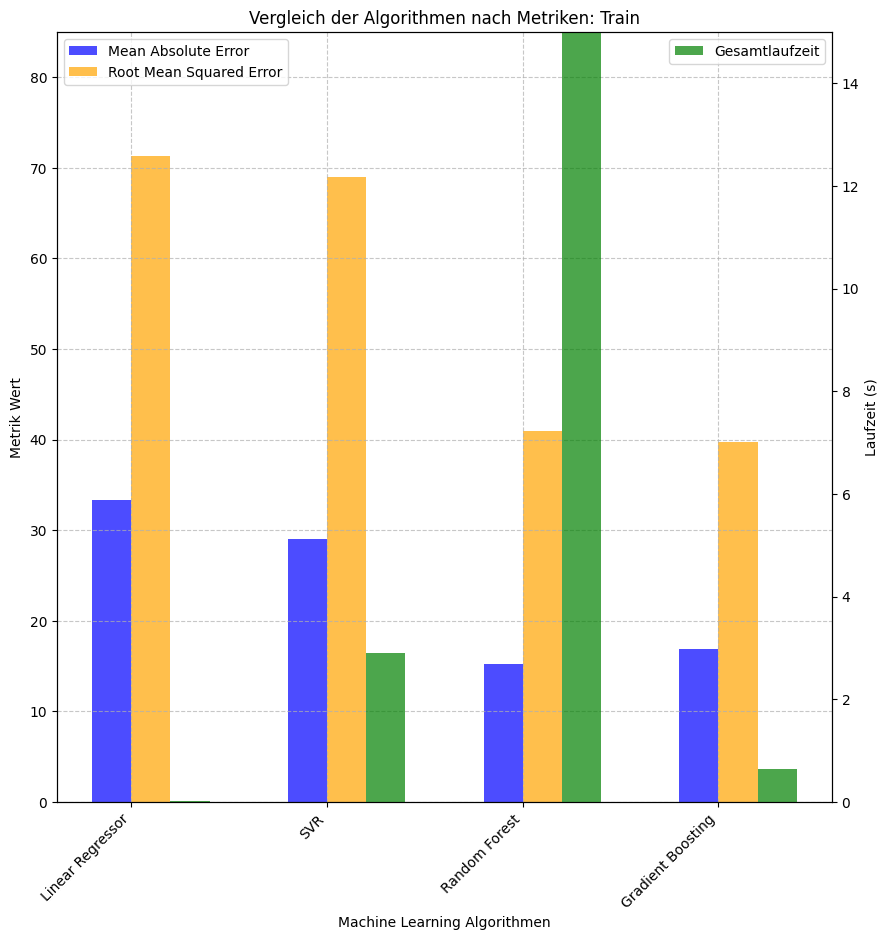

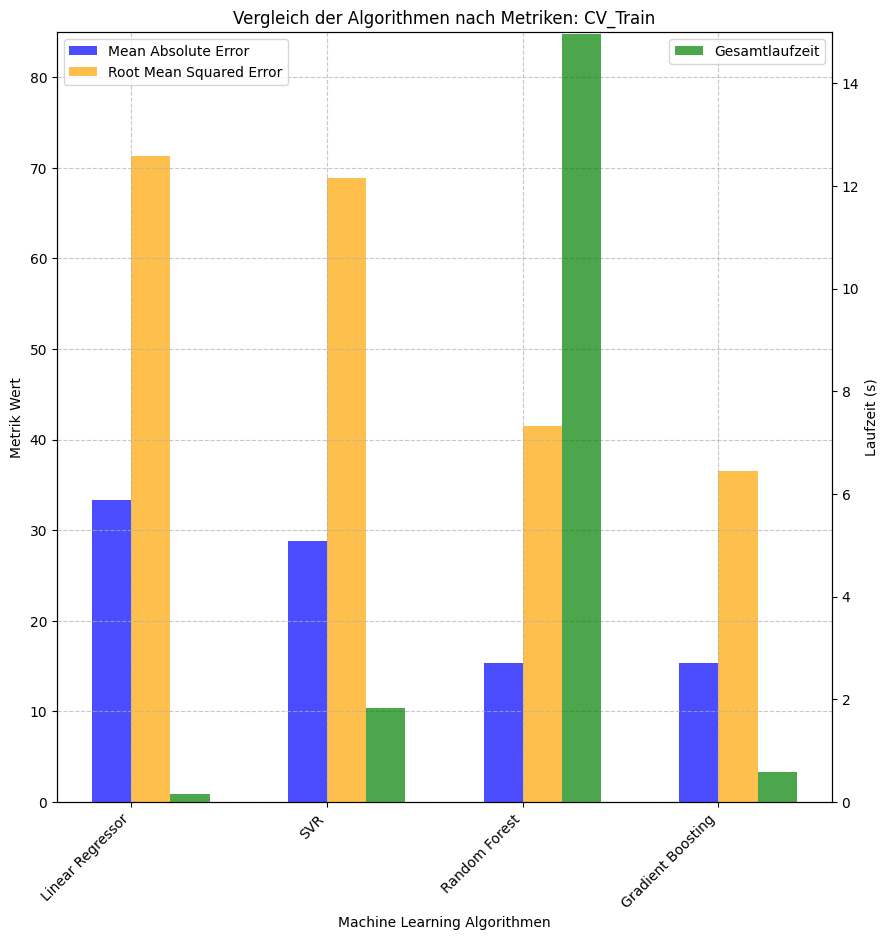

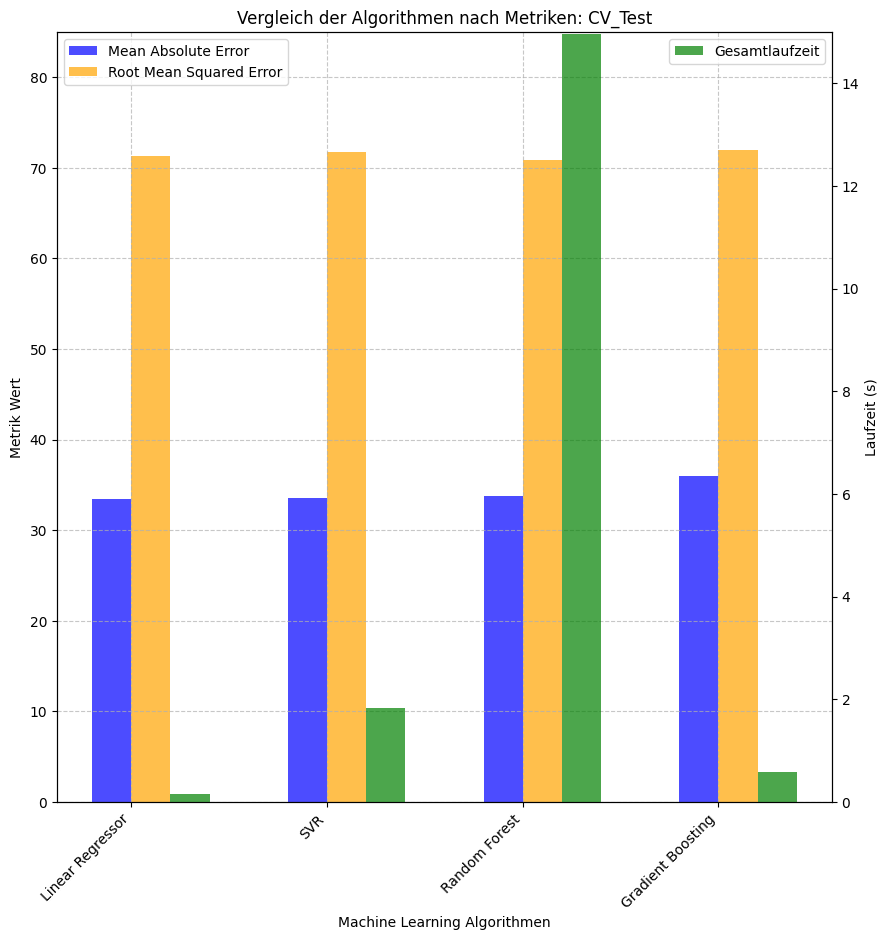

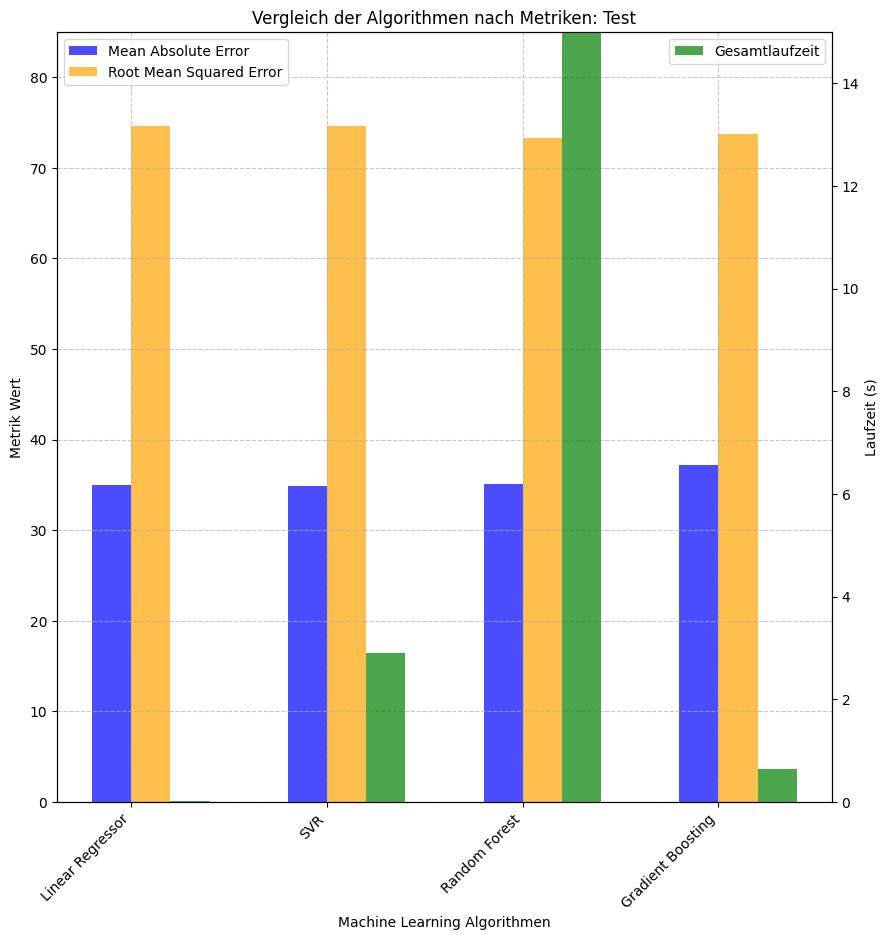

In [5]:
for item in evaluation:
    plot.model_results_barplot(selection_methode, results_metrics, metrics_upper_limit=85, runtime_upper_limit=15, plot_runtime=True, evaluation=item,name="All_Heimbach")